# Tutorial 1a: Introduction to Python for scientific computing

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from an Jupyter notebook.  You can download the notebook [here](t1a_intro_to_python.ipynb).*

In [Tutorial 0](t0a_python_for_scientific_computing.html), we installed the [Anaconda Python distribution](https://store.continuum.io/cshop/anaconda/).  Anaconda contains most of what we need to do scientific computing with Python.  At the most basic level, it has Python 3.5, which we will use as the core language for our analysis. It contains other modules we will make heavy use of, the three most important ones being [NumPy](http://www.numpy.org/), [matplotlib](http://matplotlib.org/), and [IPython](http://ipython.org).  We will also make heavy use of [pandas](http://pandas.pydata.org/), [SciPy](http://www.scipy.org/), and [scikit-image](http://scikit-image.org/) throughout the course.  We will use the `conda` package manager to keep our software updated and to install new packages we may need.  For example, you already installed [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) using `conda` in [Tutorial 0](t0a_python_for_scientific_computing.html).  For some packages, we will use `pip`.  We will be doing Markov chain Monte Carlo later in the course, mostly using [emcee](http://dan.iel.fm/emcee/current/), and also using [PyMC3](https://github.com/pymc-devs/pymc3), both of which we will install with `pip`.

Assuming you have completed [Tutorial 0](t0a_python_for_scientific_computing.html) and all necessary software is installed, we will proceed to learning how to use some of the useful packages for scientific computing using Python.  In this tutorial, we will first learn some of the basics of the Python programming language at the same time exploring the properties of NumPy's very useful (and as we'll see, ubiquitous) `ndarray` data structure.  Finally, we'll load some data and use Matplotlib to generate plots.

## `Hello, world.`

Normally we would start with a `Hello, world` program and then move systematically forward, performing a series of simple tasks in Python.  This tutorial will plow through that and go directly toward using NumPy. You will pick up Python's syntax as we go along.

Even though this is the plan, we *have* to start with `Hello, world`.  So, in your first code cell, do the following.

In [1]:
print('Hello, world.')

Hello, world.


We see the syntax for function calls in Python.  Function arguments are enclosed in parentheses.  Ok, now to modules and NumPy.

## Modules

It is common that scientific software packages such as [Matlab](http://www.mathworks.com/products/matlab/) and [Mathematica](http://www.wolfram.com/mathematica/) are optimized for a flavor of scientific computing (such as matrix computation in the case of Matlab) and are rather full-featured.  On the other hand, Python is a programming language.  It was not specifically designed to do scientific computing.  So, plain old Python is very limited in scientific computing capability.

However, Python is very flexible and allows use of **modules**.  A module contains classes, functions, attributes, data types, etc., beyond what is built in to Python. In order to use a module, you need to import it to make it available for use.  So, as we begin working on data analysis, we need to import modules we will use.

Let's now import one of the major workhorses of our class, NumPy!

In [2]:
# Importing is done with the import statement
import numpy as np

# We now have access to some handy things
print('circumference / diameter = ', np.pi)
print('cos(pi) = ', np.cos(np.pi))

circumference / diameter =  3.141592653589793
cos(pi) =  -1.0


Notice that we used the `import ... as` construction.  This enabled us to abbreviate the name of the module so we do not have to type `numpy` each time.

Also, notice that to access the (approximate) value of $\pi$ in the `numpy` module, we prefaced the name of the attribute (`pi`) with the module name followed by a dot (`np.`).  This is generally how you access attributes in modules.

We also learned an important bit of syntax: strings are enclosed in single (or double) quotes.

We're already getting dangerous with Python.  So dangerous, in fact, that we'll write our own function!

## Writing your own function (and learning a bunch of syntax!)

As an example, we will write a function that finds the roots of the quadratic equation

\begin{align}
ax^2 + bx + c = 0.
\end{align}

In [3]:
def discriminant(a, b, c):
    """
    Returns the discriminant of a quadratic polynomial
    a * x**2 + b * x + c = 0.    
    """
    return b**2 - 4.0 * a * c


def roots(a, b, c):
    """
    Returns the roots of the quadratic equation
    a * x**2 + b * x + c = 0.
    """ 
    delta = discriminant(a, b, c)
    root_1 = (-b + np.sqrt(delta)) / (2.0 * a)
    root_2 = (-b - np.sqrt(delta)) / (2.0 * a)
    
    return root_1, root_2

There is a whole bunch of syntax in there to point out.
- Even though we may have already imported NumPy in our Python session, we need to explicitly import it (and any other module we need) in the `.py` file.
- A function is defined within a module with the **`def`** statement.  It has the function prototype, followed by a colon.
- **Indentation in Python matters!** Everything indented after the **`def`** statement is part of the function.  Once the indentation goes back to the level of the **`def`** statement, you are no longer in the function.
- The operator for raising to a power is `**`.
- The return statement is used to return the result of a function.  If multiple objects are returned, they are separated by commas.
- The text within triple quotes are **doc strings**.  They say what the function or module does.  These are essential for people to know what your code is doing.

Now, let's test our new module out!

In [4]:
# Python has nifty syntax for making multiple definitions on the same line
a, b, c = 3.0, -7.0, -6.0

# Call the function and print the result
root_1, root_2 = roots(a, b, c)
print('roots:', root_1, root_2)

roots: 3.0 -0.666666666667


Very nice!

## Control flow: the `if` statement

Now, let's try another example.  This one might have a problem....

In [5]:
# Specify a, b, and c that will give imaginary roots
a, b, c = 1.0, -2.0, 2.0

# Call the function and print the result
root_1, root_2 = roots(a, b, c)
print('roots:', root_1, root_2)

roots: nan nan


/Users/Justin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/Justin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in sqrt


Oh no!  It gave us `nan`, which means "not a number," as our roots.  It also gave some warning that it encountered invalid (negative) arguments for the `np.sqrt()` function.  The roots should be $1 \pm i$, where $i = \sqrt{-1}$.  We will use this opportunity to introduce Python's control flow, starting with an **`if`** statement.

We will decree that our quadratic equation solver only handles real roots, so it will raise an **exception** if an imaginary root is encountered.  So, we modify `roots()` function as follows.

In [6]:
def roots(a, b, c):
    """
    Returns the roots of the quadratic equation
    a * x**2 + b * x + c = 0.
    """ 
    delta = discriminant(a, b, c)

    if delta < 0.0:
        raise RuntimeError('Imaginary roots!  We only do real roots!')
    else:
        root_1 = (-b + np.sqrt(delta)) / (2.0 * a)
        root_2 = (-b - np.sqrt(delta)) / (2.0 * a)
    
        return root_1, root_2

We have now exposed the syntax for a Python **`if`** statement.  The conditional expression ends with a colon, just like the **`def`** statement.  Note the indentation of blocks of code after the conditionals.  (We actually did not need the **`else`** statement, because the program would just continue without the exception, but I left it there for illustrative purposes.  It is actually preferred not to have the **`else`** statement.)

In [7]:
# Pass in parameters that will give imaginary roots
a, b, c = 1.0, -2.0, 2.0
root_1, root_2 = roots(a, b, c)

RuntimeError: Imaginary roots!  We only do real roots!

This threw the appropriate exception.

Congrats!  You wrote a working function.  But now is an important lesson....  

## When you can, use NumPy

**If you are trying to do a task that you think might be common, it's probably part of NumPy or some other package.**  Look, or ask Google, first.  In this case, NumPy has a function called `np.roots()` that computes the roots of a polynomial.  To figure out how to use it, we can either look at the doc string, or look in the [NumPy and SciPy documentation online](http://docs.scipy.org/doc/) (the documentation for `np.roots()` is available [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.roots.html)).  To look at the doc string, you can enter the following:

In [8]:
np.roots?

We see that we need to pass the coefficients of the polynomial we would like the roots of using an "`array_like`" object.  We will discuss what this means in a moment, but for now, we will just use a **list** to specify our coefficients and call the `np.roots()` function.

In [9]:
# Define the coefficients in a list (using square brackets)
coeffs = [3.0, -7.0, -6.0]

# Call np.roots.  It returns an np.ndarray with the roots
roots = np.roots(coeffs)
print('Roots for (a, b, c) = (3, -7, -6):', roots)

# It even handles complex roots!
roots = np.roots([1.0, -2.0, 2.0])
print('Roots for (a, b, c) = (1, -2, 2): ', roots)

Roots for (a, b, c) = (3, -7, -6): [ 3.         -0.66666667]
Roots for (a, b, c) = (1, -2, 2):  [ 1.+1.j  1.-1.j]


## Some `array_like` data types

In the previous example, we used a list as an `array_like` data type.  Python has several native data types.  We have already mentioned `int`s and `float`s.  We just were not very explicit about it.  Python's native `array_like` data types are **lists** and **tuples**.  There are collections of items (in this class, usually numbers) separated by commas.  They can be nested to generate lists of lists, lists of tuples, tuples of tuples, etc.  The primary difference between a list and a tuple is that a list is **mutable**, meaning that it can be changed in-place, where a tuple is **immutable**.

In [10]:
# This is a list
my_list = [1, 2, 3, 4]

# This is a tuple
my_tuple = (1, 2, 3, 4)

# We can change a list in place
my_list[1] = 1.3
print(my_list)

# We cannot change a tuple in place.  Below will raise an exception
# my_tuple[1] = 1.3

[1, 1.3, 3, 4]


Notice how we indexed the list.  The index uses square brackets.  Importantly, **indexing in Python starts with zero**.

## The `np.ndarray`: maybe your new best friend

Lists and tuples can be useful, but for many many applications in data analysis, the `np.ndarray`, which we will colloquially call a "**NumPy array**," is most often used.  They are created using the `np.array` function with a list or tuple as an argument.  Once created, we can do all sorts of things with them.  Let's play!

In [11]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([4.0, 5.0, 6.0])

# Arithmetic operations are done elementwise
print('a:      ', a)
print('a + b:  ', a + b)
print('a * b:  ', a * b)
print('1.0 + a:', 1.0 + a)
print('a**2:   ', a**2)
print('b**a:   ', b**a)

a:       [ 1.  2.  3.]
a + b:   [ 5.  7.  9.]
a * b:   [  4.  10.  18.]
1.0 + a: [ 2.  3.  4.]
a**2:    [ 1.  4.  9.]
b**a:    [   4.   25.  216.]


Let's generate some longer arrays to play with.  We will use the function `np.linspace()`.  Check out its doc string to see how it works.

In [12]:
# Make 100 evenly spaced points from 0 to 2*pi
x = np.linspace(0.0, 2.0 * np.pi, 100)

# NumPy functions also work elementwise.  Let's make a function exp(sin(x))
y = np.exp(np.sin(x))

# Let's look at them
print('x: ', x)
print('y: ', y)

x:  [ 0.          0.06346652  0.12693304  0.19039955  0.25386607  0.31733259
  0.38079911  0.44426563  0.50773215  0.57119866  0.63466518  0.6981317
  0.76159822  0.82506474  0.88853126  0.95199777  1.01546429  1.07893081
  1.14239733  1.20586385  1.26933037  1.33279688  1.3962634   1.45972992
  1.52319644  1.58666296  1.65012947  1.71359599  1.77706251  1.84052903
  1.90399555  1.96746207  2.03092858  2.0943951   2.15786162  2.22132814
  2.28479466  2.34826118  2.41172769  2.47519421  2.53866073  2.60212725
  2.66559377  2.72906028  2.7925268   2.85599332  2.91945984  2.98292636
  3.04639288  3.10985939  3.17332591  3.23679243  3.30025895  3.36372547
  3.42719199  3.4906585   3.55412502  3.61759154  3.68105806  3.74452458
  3.8079911   3.87145761  3.93492413  3.99839065  4.06185717  4.12532369
  4.1887902   4.25225672  4.31572324  4.37918976  4.44265628  4.5061228
  4.56958931  4.63305583  4.69652235  4.75998887  4.82345539  4.88692191
  4.95038842  5.01385494  5.07732146  5.14078798 

That's not very useful.  It would be nice to plot the function.  So, now is a very nice time to introduce **`matplotlib`**!

## `matplotlib`: our primary plotting tool

`matplotlib` is a tool for plotting the data stored in NumPy arrays.  We will mostly use the interactive plotting module, `matplotlib.pyplot`, which we will abbreviate as `plt`.  Its syntax is quite simple, and best learned by example.  We will plot our function and look at the graphics.

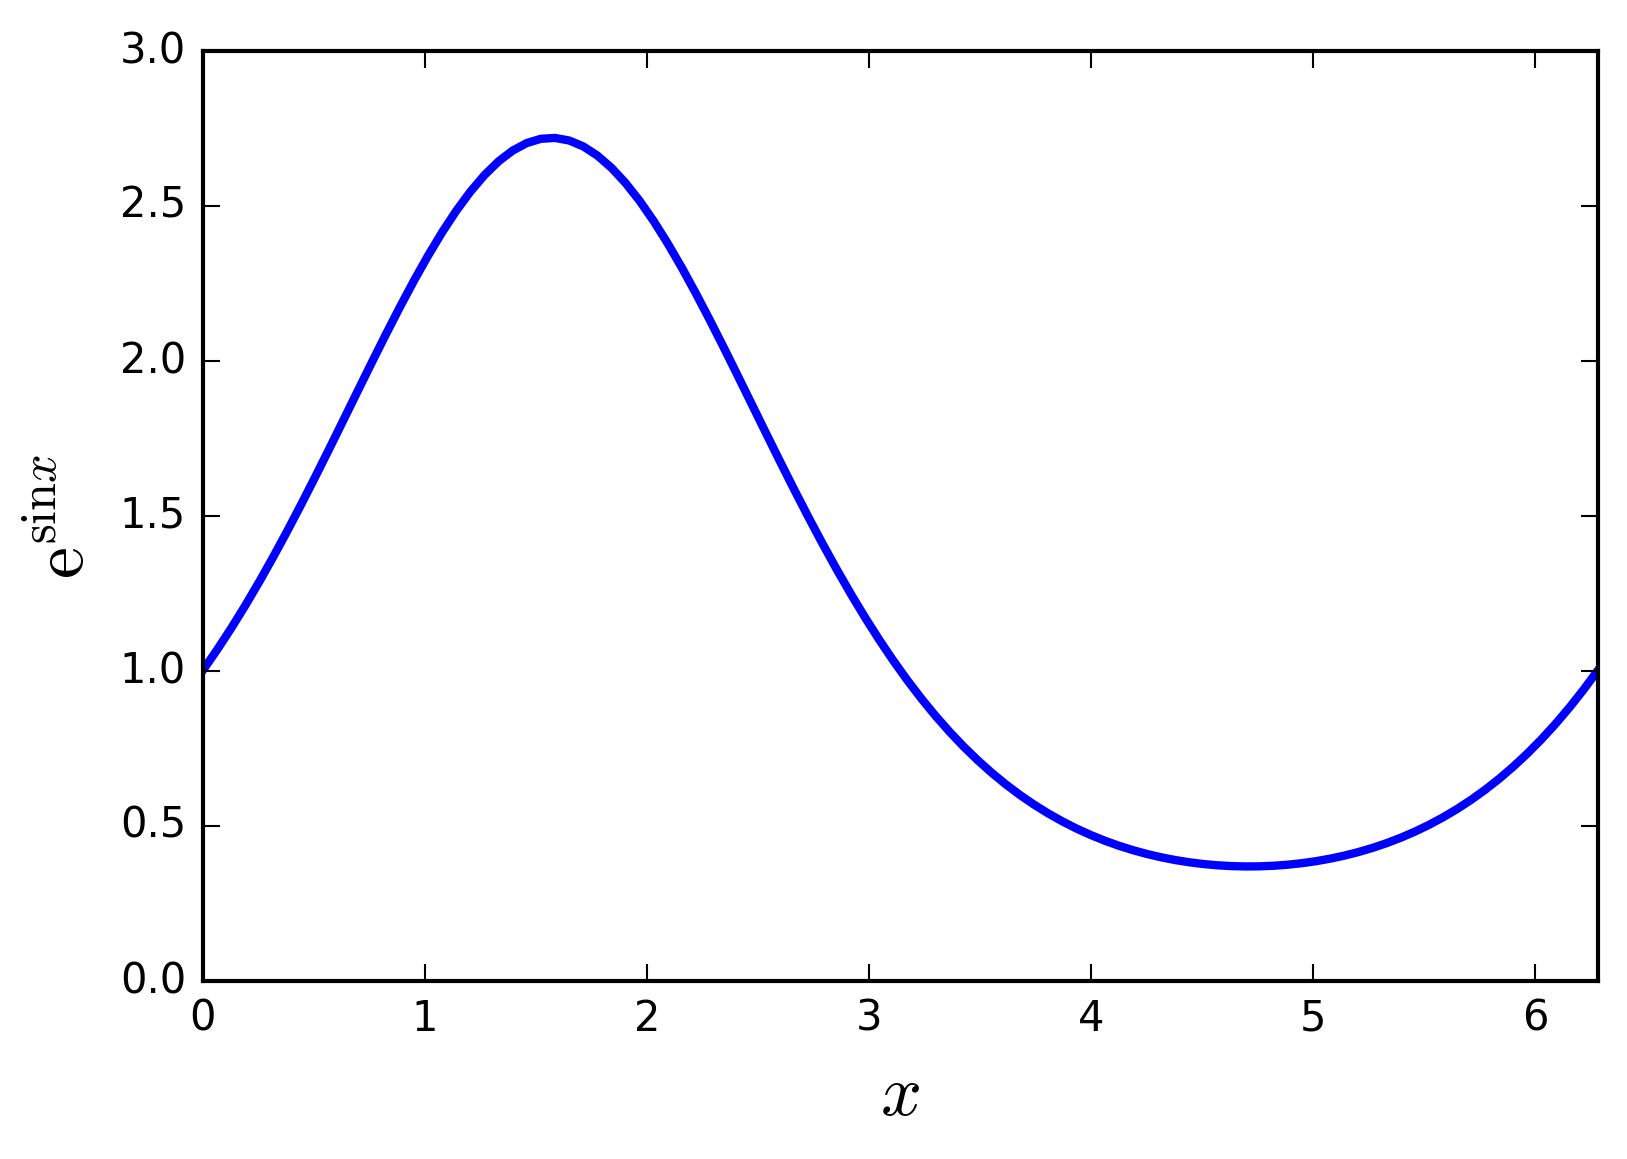

In [14]:
# Import Matplotlib
import matplotlib.pyplot as plt

# To view plots in your Jupyter notebook, you need to have this:
%matplotlib inline

# Make the plot!
plt.plot(x, y)

# Label the axes.  The r'' construction makes the string a literal, which
# enables use of $, \, etc.  matplotlib then interprets TeX!
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{e}^{\sin x}$')

# We would like the limits in the x axis to be 0 to 2*pi
plt.xlim((0.0, 2.0 * np.pi));  # Limits passes as a tuple argument

This is all very exciting!  Next, we will numerically compute the derivative of the function we just plotted.  We know the analytical expression.

\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}x} = \mathrm{e}^{\sin x}\,\cos x = y \cos x,
\end{align}

but we will also compute it numerically.  We will do it using forward differencing.

\begin{align}
\frac{\mathrm{d}y(x_i)}{\mathrm{d}x} \approx \frac{y(x_{i+1}) - y(x_i)}{x_{i+1} - x_i}.
\end{align}

We will use this opportunity to look at another aspect of Python's control flow, the **`for` loop**.

## Control flow: the `for` loop

Use of a `for` loop is best seen through example.  We will define a function to do finite difference differentiation.

In [15]:
# Define forward differencing function
def forward_diff(y, x):
    """Compute derivative by forward differencing."""

    # Use np.empty to make an empty ndarray to put our derivatives in
    deriv = np.empty(len(y) - 1)

    # Use a for loop to go through each point and compute forw. diff. deriv.
    for i in range(len(y)-1):
        deriv[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        
    # Return the derivative (remember, it is a NumPy array)
    return deriv
        
# Call the function to perform finite differencing
deriv = forward_diff(y, x)

Let's go over some of the functions we just used there.  The `len()` function returns the length of a one-dimensional array.  In our case, `len(y)` is 100, since `y` has 100 elements.

The `range()` function is built in to Python.  It generates integers that we can use to iterate **`for`** loops.  In this case, it generates all integers from 0 to 98.  That's right, even though `len(y) - 1` is 99, the range function does not generate the last number.  Don't get burned by this!

We used the `for` loop to successively compute the elements of the array.  We took care to note that there are only 99 difference of points and 100 total points.

Now, we can plot our derivatives.  Let's plot them right on top of the analytical expression.

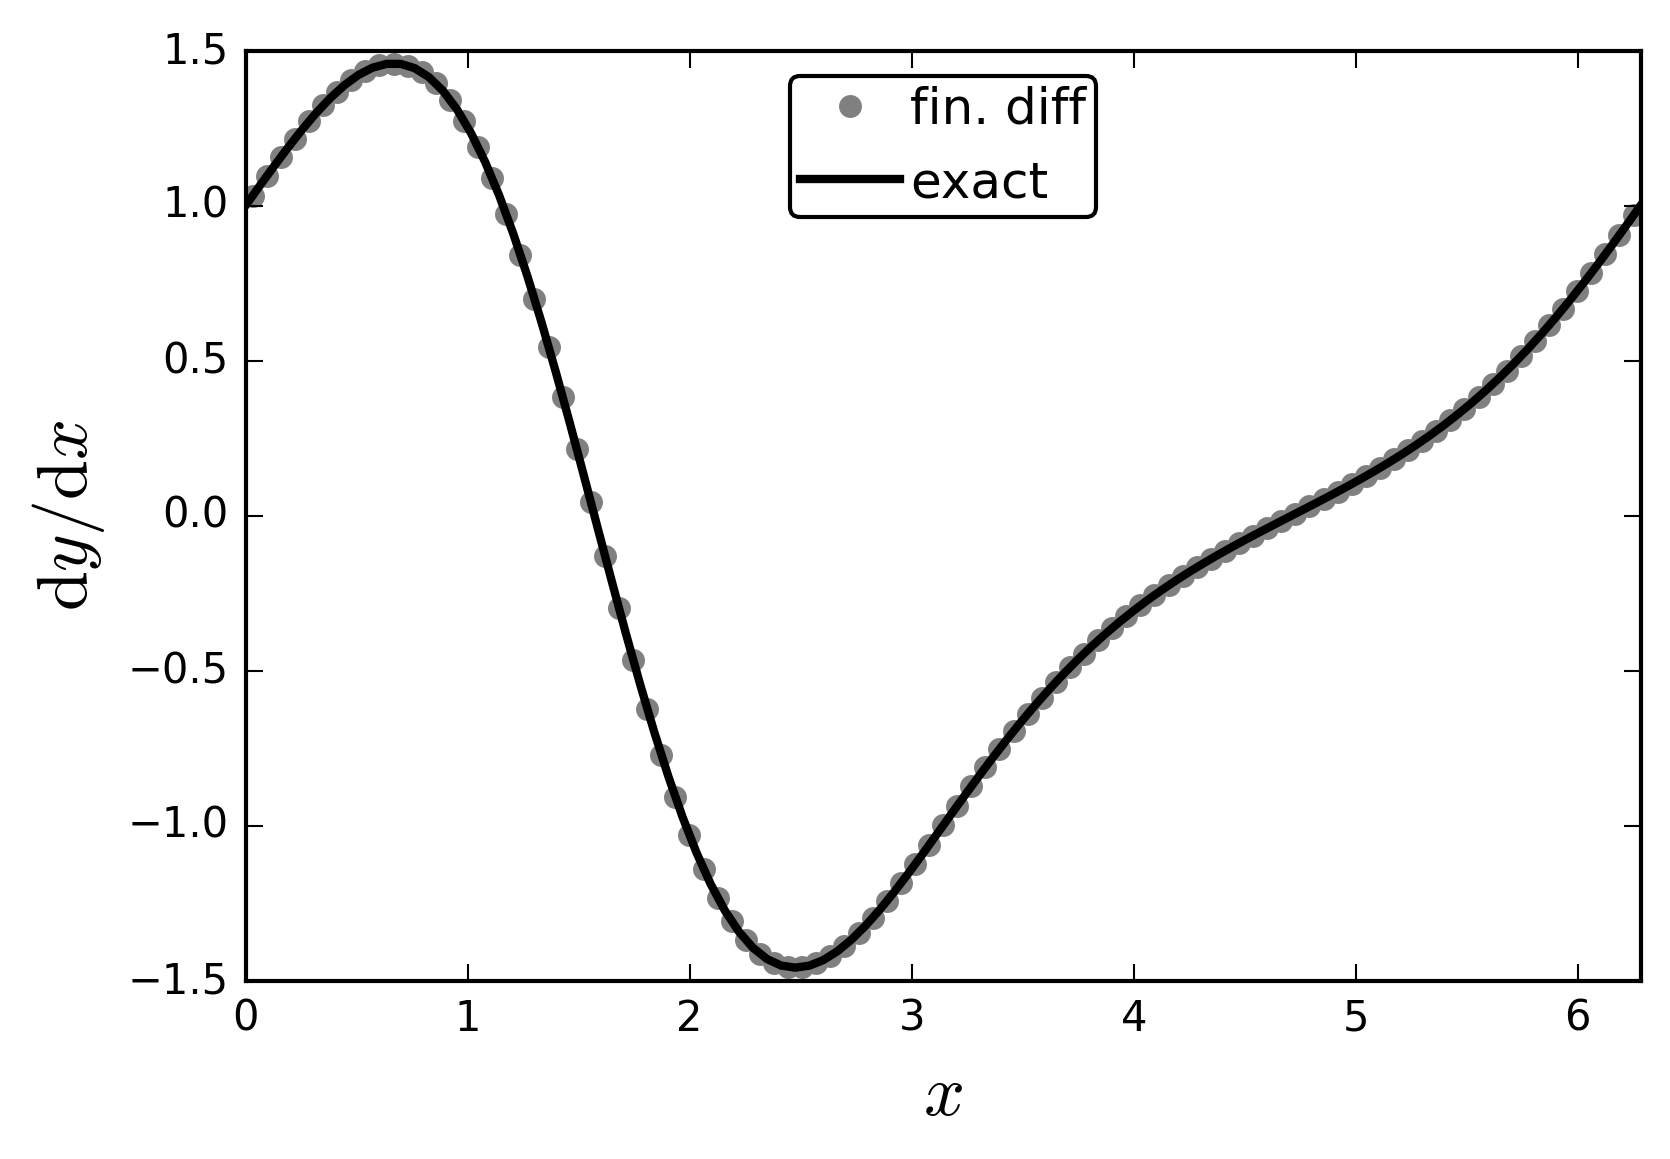

In [17]:
# Compute exact derivative
deriv_exact = y * np.cos(x)

# Plot approximate derivative with gray dots; deriv is approximately between
# grid points in x
plt.plot((x[1:] + x[:-1]) / 2.0, deriv, marker='.', color='gray', 
         linestyle='None', markersize=10)

# Plot exact derivative as a black line
plt.plot(x, deriv_exact, color='black')

# Label axes, set axis limits
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{d}y/\mathrm{d}x$')
plt.xlim((0.0, 2.0 * np.pi))

# Put in a legend
plt.legend(('fin. diff', 'exact'), loc='upper center', numpoints=1);

In the code above, notice how we included a legend in the plot.  The first argument is a tuple containing the names of the labels for the two curves.  The following arguments are **keyword arguments**.  Keyword arguments do not need to be specified in the function call.  If left unspecified, default values are used for them.  They are specified with the syntax above, as `kwarg=value` within the function call.

I also want to draw your attention to the call to `plt.plot` for the derivative:

    plt.plot((x[1:] + x[:-1]) / 2.0, deriv, 'rx')

Remember that the derivative is only defined for 99 of the 100 points we sample along the $x$-axis.  We therefore **sliced** the `x` NumPy array.  The colon implies filling in all indices.  Python allows negative indices, and `-1` means the last index of the array.  Like the `range` function, slicing does not include the last index.  So, `x[:-1]` means that we take all values of the array except the last one.  Similarly, `x[1:]` means that we take all values of the array except the first one.

You might think finite differencing is something that one would commonly want to do, right?  So, of course, NumPy has a function for it!

In [18]:
# Use np.diff function to compute forward differences
np_deriv = np.diff(y) / np.diff(x)

# Verify that the results is the same we got
print('Did NumPy give what we got?:', np.allclose(np_deriv, deriv))

Did NumPy give what we got?: True


That code is much cleaner than our clunky **`for`** loop.  It is also much faster.  We can use IPython `%timeit` **magic function** to test.

In [19]:
%timeit np_deriv = np.diff(y) / np.diff(x)

%timeit deriv = forward_diff(y, x)

The slowest run took 5.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.26 µs per loop
10000 loops, best of 3: 61.2 µs per loop


Eight times faster using NumPy!  The reason for this is that under the hood, NumPy functions are highly optimized.  They use compiled code (C or Fortran) and often use highly optimized packages like [BLAS](http://www.netlib.org/blas/), [LAPACK](http://www.netlib.org/lapack/), [ATLAS](http://math-atlas.sourceforge.net), etc. 

## Calling an object's method: an example with integration

We will now integrate our function $y(x)$.  From the integral formulas for modified Bessel functions, we know

\begin{align}
\int_0^{2\pi}\mathrm{d} x\, \mathrm{e}^{\sin x} = 2\pi \,I_0(1),
\end{align}

where $I_0$ is the modified Bessel function of the first kind.  Fortunately, SciPy has a module that allows for calculation of special functions, this particular Bessel function included.

In [20]:
import scipy.special

# Call scipy.special.iv to compute the value of the integral
exact_integral = 2.0 * np.pi * scipy.special.iv(0, 1.0)

print('Exact integral:', exact_integral)

Exact integral: 7.95492652101


Now, let's approximately compute the integral by the trapezoidal rule.  We could write a **`for`** loop to do this.  An easier way to do this integral is to note that the integral is over the periodic domain of the function.  If we were to write the function as a Fourier series, it consists of a constant term, plus a bunch of terms with periods of multiples of $2\pi$.  So, only the constant term, which is the mean of the function over the interval, remains.  All of the added periodic terms integrate to zero.  The integral is then just like computing the area of a rectangle: $2\pi \langle y(x)\rangle_x$.

\begin{align}
\int_0^{2\pi}\mathrm{d} x\, y(x) \approx \frac{2\pi}{n}\sum_{i=0}^{n} y(x_i),
\end{align}

where we have sampled $y$ at $n$ evenly spaced points over the interval of length $2\pi$.  We can then use the `mean` method of NumPy arrays to quickly carry out the sum.

In [21]:
# Compute integral numerically (do not use last point because it would
# then appear twice in the mean)
approx_integral = 2.0 * np.pi * y[:-1].mean()

print('Approx integral:', approx_integral)
print('exact - approx: ', exact_integral - approx_integral)

Approx integral: 7.95492652101
exact - approx:  0.0


It is exact to machine precision!  This is a feature known as *spectral accuracy*, which we will not cover in this class, but is fascinating nonetheless.

Note how we used the construction `y[:-1].mean()`.  `y` is a NumPy array, so it has associated with it many **methods**.  A method is a function that can operate on an instance of a class.  `y` is an instance of a NumPy array, so `y.mean()` computes the mean of the NumPy array `y`.  It is advisable to use these native methods on NumPy arrays.  To prove this point, we will compare use of Python's built-in `sum()` function to compute a sum, compared to a computation using NumPy.  We will also compare it to summing using a **`for`** loop.

In [22]:
# Make a sum function that uses a for loop
def sum_with_for_loop(y):
    my_sum = 0.0
    for i in range(len(y)):
        my_sum += y[i]  # += adds the right hand side to the left hand side
    
    return my_sum

# Time the different ways of evaluating the sum the entries of a NumPy array
%timeit sum_with_for_loop(y)
%timeit sum(y)
%timeit np.sum(y)
%timeit y.sum()

100000 loops, best of 3: 14.9 µs per loop
100000 loops, best of 3: 9.82 µs per loop
The slowest run took 13.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.87 µs per loop
The slowest run took 11.08 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.49 µs per loop


## Making prettier plots

The plots we generated above look *ok*, but, in my opinion, they are ugly.  We can make much prettier plots using the [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) package.  We should also display the plots as **vector graphics**. By default, Jupyter notebooks display plots as PNGs, which are raster graphics. In general, **if you are plotting vector data for publication, use vector graphics.** For the purposes of this course, however, PNGs embedded in the Jupyter notebooks are fine. (We can configure Matplotlib to make pretty SVG plots in Jupyter notebooks using Seaborn, as we saw in [Tutorial 0b](t0b_intro_to_jupyter_notebooks.html).)

In [23]:
# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

Now, let's try our plot again.

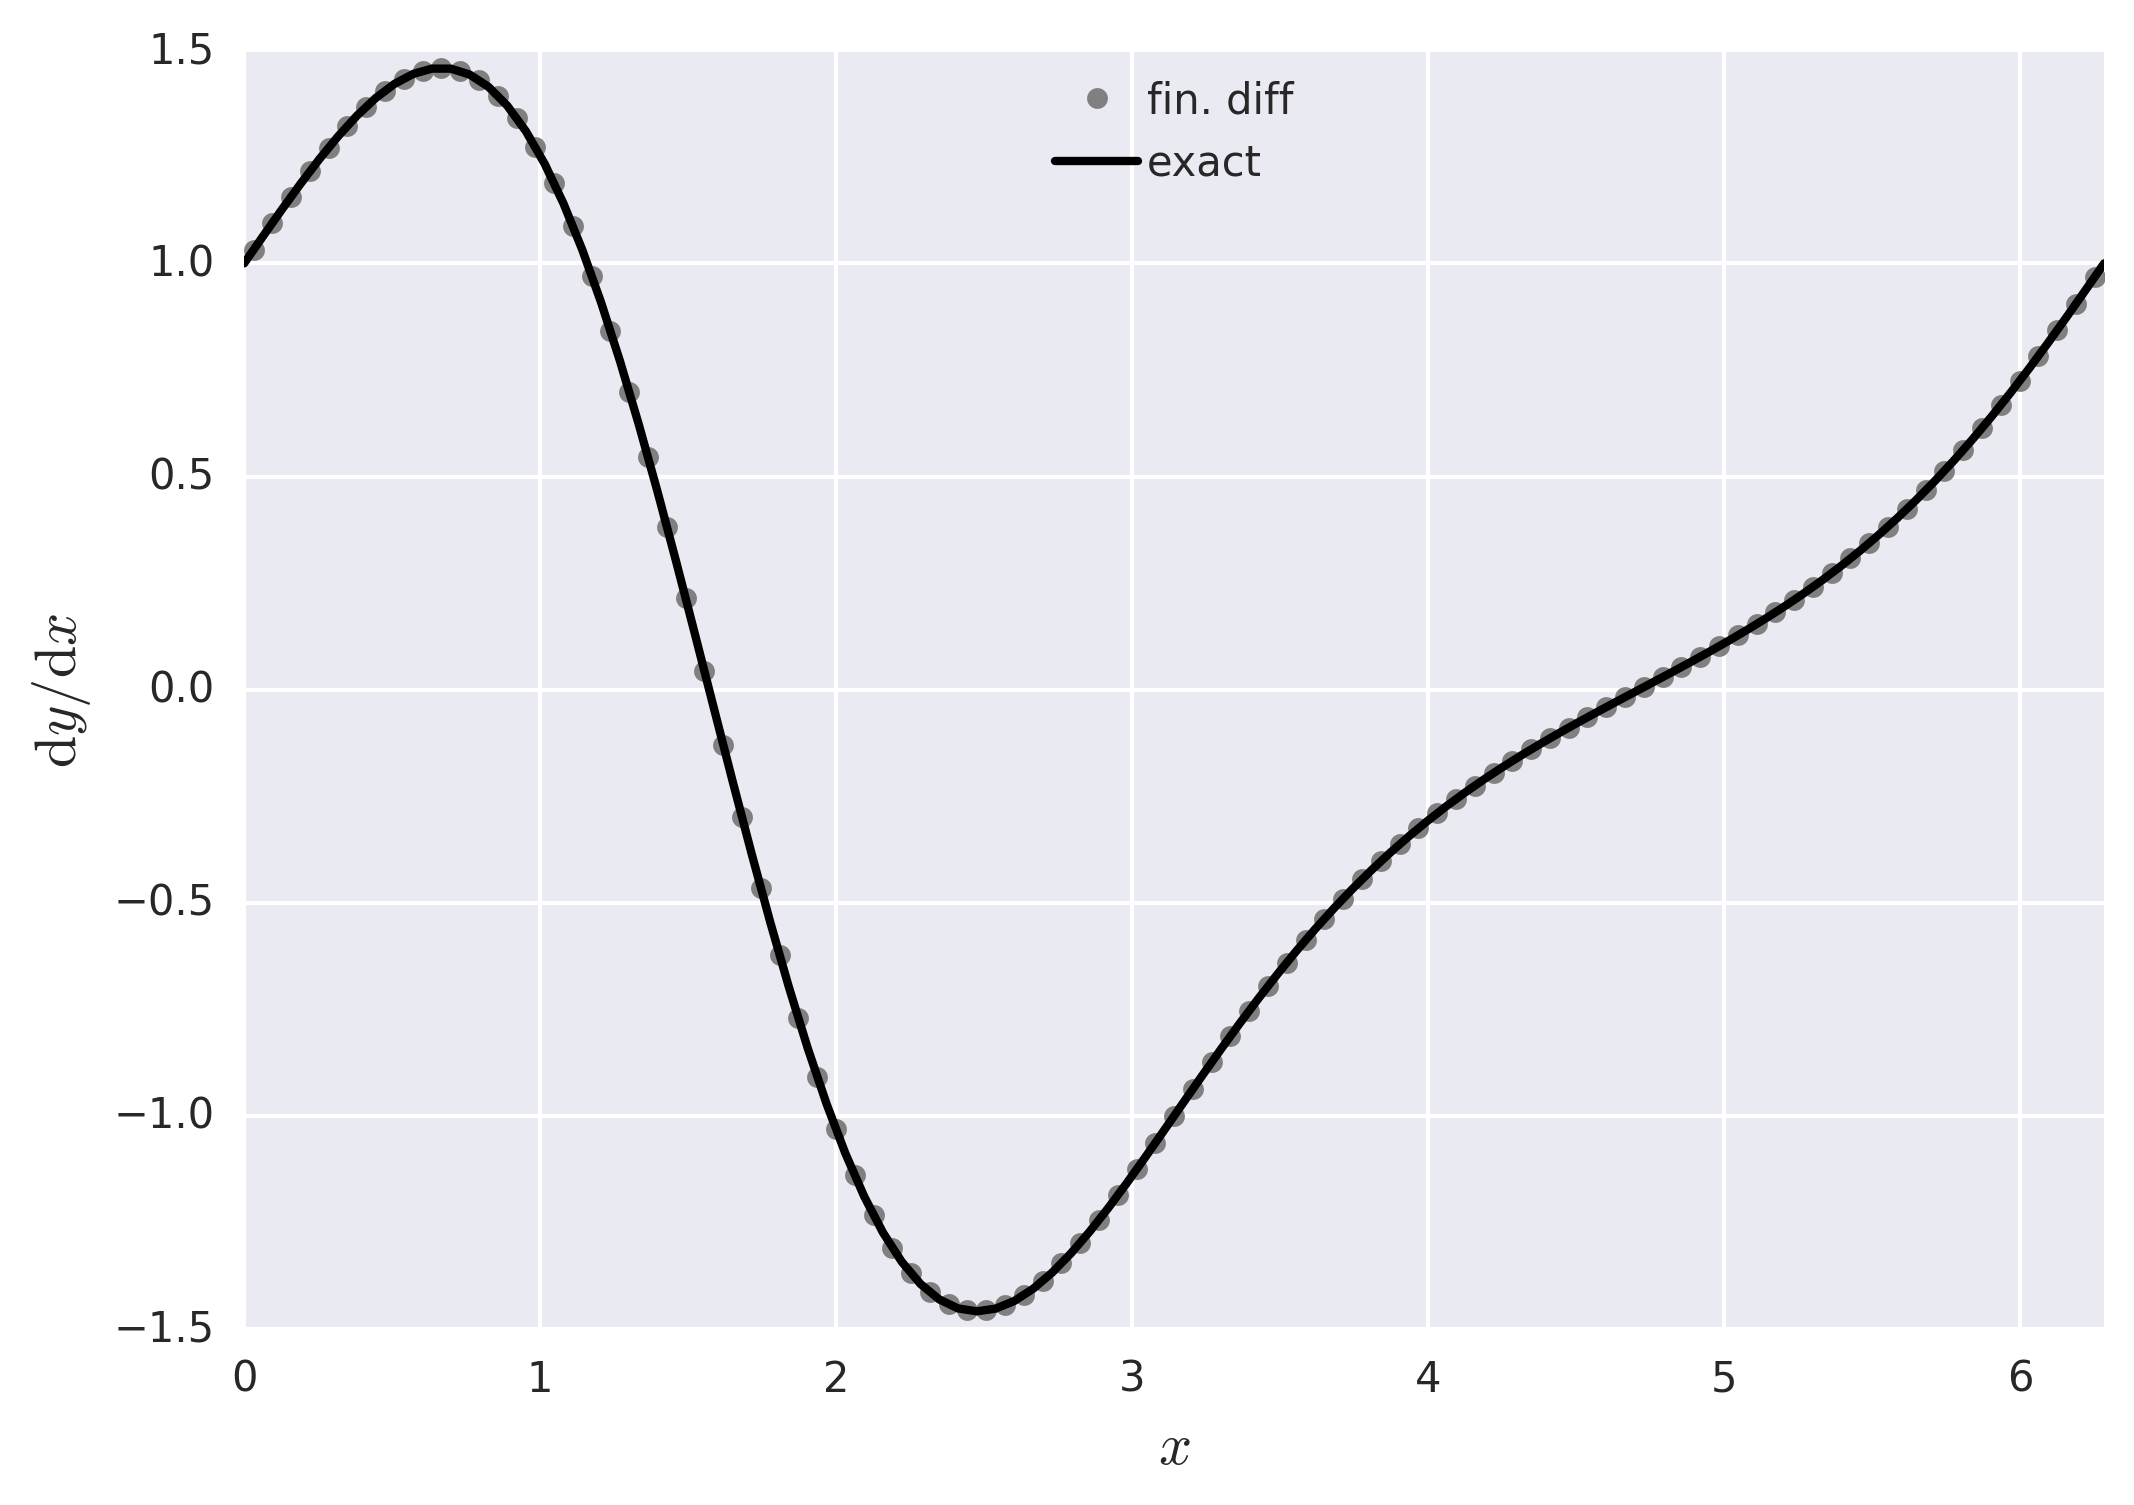

In [25]:
# Plot approximate derivative with gray dots; deriv is approximately between
# grid points in x
plt.plot((x[1:] + x[:-1]) / 2.0, deriv, marker='.', color='gray', 
         linestyle='None', markersize=10)

# Plot exact derivative as a black line (given by 'k-').
plt.plot(x, deriv_exact, color='black')

# Label axes, set axis limits
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{d}y/\mathrm{d}x$')
plt.xlim((0.0, 2.0 * np.pi))

# Put in a legend
plt.legend(('fin. diff', 'exact'), loc='upper center', numpoints=1);

## Using Bokeh for interactive plotting
Also as discussed in [Tutorial 0b](t0b_intro_to_jupyter_notebooks.html), we can use Bokeh to do interactive plotting, which is useful for exploring data. We will cover Bokeh in much more depth in an [auxiliary lesson](a1_bokeh.html).

In [26]:
# Import Bokeh modules for interactive plotting
import bokeh.io as bi
import bokeh.plotting as bp

# Set up Bokeh for inline viewing
bi.output_notebook()

# Set up plot
p = bp.figure(width=650, height=400, x_axis_label='x', y_axis_label='dy/dx',
              tools='pan,wheel_zoom,box_zoom,resize,reset')

# Populate glyphs
p.circle((x[1:] + x[:-1]) / 2.0, deriv, color='gray', legend='fin. diff.')
p.line(x, deriv_exact, color='black', line_width=2, legend='exact')

# Position legend
p.legend.location = 'top_center'

# Display plot
bp.show(p)

Loading BokehJS ...

## Conclusions

This concludes our introductory tour of Python with some NumPy, SciPy, and matplotlib thrown in for good measure.  There is still *much* to learn, but you will pick up more and more tricks and syntax as we go along.

As we work through the course, it is important to remember that Python with NumPy, SciPy, `matplotlib`, `pandas`, and the other packages we will use throughout the term, are just tools we are using to analyze data.  They not the best tool for each type of data set.  However, the Python-based tools constitute a nice Swiss Army knife.  They can almost always get the job done.

Most importantly, **we are using Python to learn data analysis concepts and methods**.  This is **not** a class about Python; it is a class about data analysis in the biological sciences.